In [6]:
import numpy as np
class getCol:
    matrix = []
    def __init__(self, file, delim):
        #with open(file, 'rU') as f: 
        f=open(file, 'rU').readlines()[11:]    
        getCol.matrix =[filter(None, line.rstrip('\n').split(delim)) for line in f]

    def __getitem__ (self, key):
        column = []
        for row in getCol.matrix:
            try:
                column.append(row[key])
            except IndexError:
                # pass
                column.append("")
        return column


fpath='D:/4_muonSR/mmcalc-1.1beta/output/MnO_dip-frequency-histogram.tsv'

#print getCol(fpath,'\t')[0]
#print getCol(fpath,'\t')[1]
#freq0=map(float, getCol(fpath,'\t')[0])
#prob0=map(float, getCol(fpath,'\t')[1])
fmhz=np.asarray(map(float, getCol(fpath,'\t')[0]))*5.0e-6
pmhz=np.asarray(map(float, getCol(fpath,'\t')[1]))/5.0e-6
#print fmhz
#print pmhz


In [7]:
fpath1='D:/4_muonSR/mmcalc-1.1beta/output/MnO_dip_O9-17-frequency-histogram.tsv'

fmhz1=np.asarray(map(float, getCol(fpath1,'\t')[0]))*5.0e-6
pmhz1=np.asarray(map(float, getCol(fpath1,'\t')[1]))/5.0e-6
#print fmhz1
#print pmhz1


In [8]:
fpath2='D:/4_muonSR/mmcalc-1.1beta/output/Mn_dip_no_Cons-frequency-histogram.tsv'

fmhz2=np.asarray(map(float, getCol(fpath2,'\t')[0]))*5.0e-6
pmhz2=np.asarray(map(float, getCol(fpath2,'\t')[1]))/5.0e-6
#print fmhz2
#print pmhz2


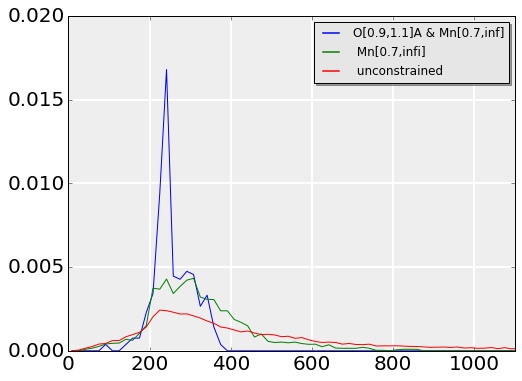

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, FloatSlider, RadioButtons

xlim=FloatSlider(min=0, max=1100, step=100, value=500)
#ylim=FloatSlider(min=0, max=3.0, step=0.1, value=2)
#frequ=FloatSlider(min=-2, max=10.0, step=0.1, value=2)
@interact(xlim0=xlim)
def plot(xlim0):
    fig, ax = plt.subplots(figsize=(8, 6),
                       subplot_kw={'axisbg':'#EEEEEE',
                                   'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    ax.plot(fmhz,pmhz,label='O[0.9,1.1]A & Mn[0.7,inf]')
    ax.plot(fmhz1,pmhz1,label=' Mn[0.7,infi]')
    ax.plot(fmhz2,pmhz2,label=' unconstrained')
    
    ax.set_xlim(0, xlim0)
    ax.set_ylim(0, 0.02,0.005)
    #ax.add_axes([0.4,0.14,0.2,0.2]
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
   
    legend = ax.legend(loc='upper right', shadow=True)

    # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
    frame =legend.get_frame()
    frame.set_facecolor('0.90')

# Set the fontsize
    for label in legend.get_texts():
        label.set_fontsize('large')

    for label in legend.get_lines():
        label.set_linewidth(1.5)  # the legend line width
    #plt.savefig('D:\Profile\Download\mmcalc-1.1beta\output/MnO.png', bbox_inches='tight')
    plt.show()

